### Supervised VS Unsupervised Learning

*Supervised* learning involves teaching a machine learning model by providing it with labeled data, while *unsupervised* learning allows the model to discover patterns and information in unlabeled data. Supervised learning includes **classification** and **regression** techniques, while unsupervised learning involves methods such as **clustering**, **dimension reduction**, **density estimation**, and **market basket analysis**. Supervised learning provides more control and accuracy, while unsupervised learning is more exploratory and less controllable.

### Regression

*Regression* is a process of predicting a continuous value using one or more independent variables. The dependent variable is the value we want to predict, while the independent variables are the causes of that value. Regression models can be simple or multiple, depending on the number of independent variables used. Regression analysis has various applications, such as **forecasting**, **predictions**, and **estimations**. There are different regression algorithms available, each with its own specific conditions for application.

##### Simple Linear Regression

Linear regression is a statistical method used to model the relationship between two or more variables. It is a simple and widely used approach for predicting a continuous value based on other variables. In linear regression, there is a dependent variable and one or more independent variables. The goal is to find the best-fit line that minimizes the error between the predicted values and the actual values. The line is represented by a linear equation, where the coefficients (theta 0 and theta 1) are adjusted to minimize the mean squared error. Once the line is fitted to the data, it can be used to make predictions for new data points. Linear regression is fast, easy to understand, and highly interpretable, making it a useful tool in machine learning.

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Set a random seed for reproducibility
torch.manual_seed(42)

# Generate some data (y = 3x + 2 + noise)
X = torch.linspace(0, 10, 100).reshape(-1, 1)  # 100 data points from 0 to 10
y = 3 * X + 2 + torch.randn(X.size())  # y = 3x + 2 + noise


In [3]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 input feature, 1 output feature

    def forward(self, x):
        return self.linear(x)


In [5]:
model = LinearRegressionModel()

# Define loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [6]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    
    # Forward pass
    y_pred = model(X)
    
    # Compute loss
    loss = criterion(y_pred, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update parameters
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 1.5486
Epoch [200/1000], Loss: 1.1794
Epoch [300/1000], Loss: 1.0429
Epoch [400/1000], Loss: 0.9925
Epoch [500/1000], Loss: 0.9738
Epoch [600/1000], Loss: 0.9669
Epoch [700/1000], Loss: 0.9644
Epoch [800/1000], Loss: 0.9635
Epoch [900/1000], Loss: 0.9631
Epoch [1000/1000], Loss: 0.9630


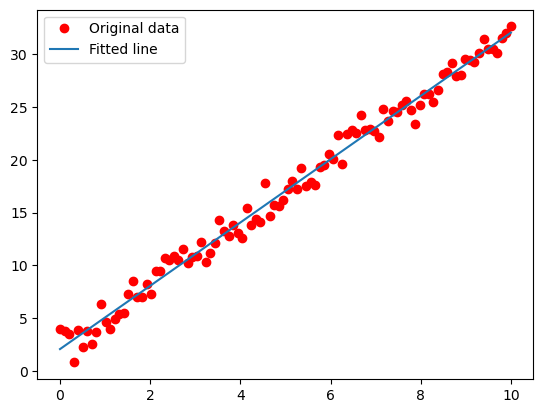

In [7]:
# Plot original data and fitted line
model.eval()  # Set to evaluation mode
with torch.no_grad():  # No need to track gradients
    predicted = model(X).detach().numpy()
    
plt.plot(X.numpy(), y.numpy(), 'ro', label='Original data')
plt.plot(X.numpy(), predicted, label='Fitted line')
plt.legend()
plt.show()
